On the provided "Online News Popularity Data Set," you need to implement the following models without using scikit-learn libraries:

1.Decision Trees (from scratch)

2.Linear Regression (without regularization, L1 regularization, L2 regularization, and elastic net)

3.Classification with Linear Regression (using the threshold function seen in class)

4.Logistic Regression for Classification

5.Regression with k-Nearest Neighbors algorithm

6.Classification with k-Nearest Neighbors algorithm

7.Regression with Neural Networks

8.Classification with Neural Networks

You can use scikit-learn only to verify that your implemented models behave correctly.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import BallTree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '')

In [4]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [5]:
def oneHot(data, col):
    data = pd.concat([data,pd.get_dummies(data[col])],axis=1)
    return data

In [6]:
def model_score(model):
    train_pred = model.predict(X_train)
    train_conf_matrix = metrics.confusion_matrix(y_train, train_pred)
    
    test_pred = model.predict(X_test)
    test_conf_matrix = metrics.confusion_matrix(y_test, test_pred)
    
    TN = train_conf_matrix[0][0]
    TP = train_conf_matrix[1][1]
    FP = train_conf_matrix[0][1]
    FN = train_conf_matrix[1][0]

    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    P = df['target'].sum()
    N = df.shape[0]-df['target'].sum()

    lift_P = sensitivity/(P/(P+N))
    lift_N = specificity/(N/(P+N))
    
    print("TRAIN")
    print("TP = " + str(TP))
    print("TN = " + str(TN))
    print("FP = " + str(FP))
    print("FN = " + str(FN))
    print("Sensitivity = " + str(sensitivity))
    print("Specificity = " + str(specificity))
    print("Random selection felt = " + str(P/(P+N)))
    print("Random selection of spec " + str(N/(P+N)))
    print("Increment (lift) felt = " + str(lift_P))
    print("Increment (lift) spec = " + str(lift_N))
    
    TN = test_conf_matrix[0][0]
    TP = test_conf_matrix[1][1]
    FP = test_conf_matrix[0][1]
    FN = test_conf_matrix[1][0]

    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    P = df['target'].sum()
    N = df.shape[0]-df['target'].sum()

    lift_P = sensitivity/(P/(P+N))
    lift_N = specificity/(N/(P+N))
    
    print('TEST')
    print("TP = " + str(TP))
    print("TN = " + str(TN))
    print("FP = " + str(FP))
    print("FN = " + str(FN))
    print("sensitivity = " + str(sensitivity))
    print("Specificity = " + str(specificity))
    print("Random selection felt = " + str(P/(P+N)))
    print("Random selection of spec " + str(N/(P+N)))
    print("Increment (lift) felt = " + str(lift_P))
    print("Increment (lift) spec = " + str(lift_N))

In [7]:
def roc_curve(model, model_name):
    pred_prob_train = model.predict_proba(X_train)
    preds_train = pred_prob_train[:, 1]
    spec_train, felt_train, treshold_train = metrics.roc_curve(y_train, preds_train)
    roc_auc_train = metrics.auc(spec_train, felt_train)

    pred_prob_test = model.predict_proba(X_test)
    preds_test = pred_prob_test[:,1]
    spec_test, felt_test, treshold_test = metrics.roc_curve(y_test, preds_test)
    roc_auc_test = metrics.auc(spec_test, felt_test)

    print("AUC train = " + str(roc_auc_train))
    print("AUC test = " + str(roc_auc_test))
    
    plt.figure(figsize=(8,8))
    plt.plot(spec_test, felt_test, label='Test',color = (255/255, 59/255, 59/255))
    plt.plot(spec_train, felt_train, label='Train', color = (0/255, 60/255, 201/255))
    plt.plot([0, 1], [0, 1], '--', color = (41/255, 41/255, 41/255))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(np.arange(0, 1.1, step=0.1))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xlabel('1 - Specificity',fontsize=13)
    plt.ylabel('sensitivity',fontsize=13)
    plt.title(f'ROC curve for model {model_name}',fontsize=13)
    plt.legend(loc='lower right',fontsize = 13)
    plt.savefig(model_name+".png")
    plt.show()

In [8]:
### TARGET
df['target'] = np.where(df['shares']>=1400, 1, 0)

In [9]:
print(df[['shares','target']])
print("A number greater than or equal to 1400: ", df['target'].sum())
print("Number less than 1400: ", df.shape[0]-df['target'].sum())

       shares  target
0         593       0
1         711       0
2        1500       1
3        1200       0
4         505       0
...       ...     ...
39639    1800       1
39640    1900       1
39641    1900       1
39642    1100       0
39643    1300       0

[39644 rows x 2 columns]
A number greater than or equal to 1400:  21154
Number less than 1400:  18490


## diff max min positive polarity i diff max min negative polarity

In [10]:
df['diff_max_min_positive_polarity'] = df['max_positive_polarity'] - df['min_positive_polarity']

In [11]:
df['diff_max_min_negative_polarity'] = df['max_negative_polarity'] - df['min_negative_polarity']

## world_enter i tech_socmed i life_socmed i other

In [12]:
conditions = [
    (df['data_channel_is_lifestyle'] == 1),
    (df['data_channel_is_entertainment'] == 1),
    (df['data_channel_is_bus'] == 1),
    (df['data_channel_is_socmed'] == 1),
    (df['data_channel_is_tech'] == 1),
    (df['data_channel_is_world'] == 1),
    (df['data_channel_is_world']+df['data_channel_is_tech']+df['data_channel_is_socmed']+df['data_channel_is_bus']+df['data_channel_is_bus']+df['data_channel_is_entertainment']+df['data_channel_is_lifestyle']==0)]
choices = ["Lifestyle", "Entertainment", 'Bus','Socmed','Tech','World','Other']
df['data_channel'] = np.select(conditions, choices)
print(df['data_channel'])

0        Entertainment
1                  Bus
2                  Bus
3        Entertainment
4                 Tech
             ...      
39639             Tech
39640           Socmed
39641            Other
39642            World
39643    Entertainment
Name: data_channel, Length: 39644, dtype: object


In [13]:
df = oneHot(df, 'data_channel')

In [14]:
df.columns[65:72]

Index(['Bus', 'Entertainment', 'Lifestyle', 'Other', 'Socmed', 'Tech',
       'World'],
      dtype='object')

In [15]:
dc = df.columns.values[65:72]

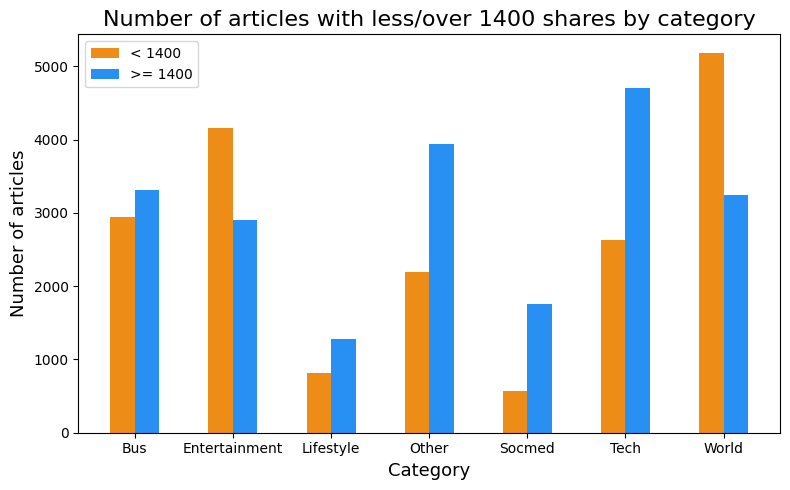

In [16]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]

how_many_unpopular = unpopular[dc].sum()
how_many_popular = popular[dc].sum()

fig = plt.figure(figsize = (8,5))

plt.title("Number of articles with less/over 1400 shares by category", fontsize = 16)
plt.bar(np.arange(len(dc)) - 0.125, how_many_unpopular, width = 0.25, align = "center", color = (237/255, 141/255, 24/255), label = "< 1400")
plt.bar(np.arange(len(dc)) + 0.125, how_many_popular, width = 0.25, align="center", color = (39/255, 144/255, 242/255), label = ">= 1400")

plt.xticks(np.arange(len(dc)), dc)
plt.ylabel("Number of articles", fontsize = 13)
plt.xlabel("Category", fontsize = 13)
    
plt.legend(loc = 'upper left')
plt.tight_layout()

plt.show()

In [17]:
conditions = [
    ((df['data_channel'].str.lower() == 'world') | (df['data_channel'].str.lower() == 'entertainment')),
    ((df['data_channel'].str.lower() == 'lifestyle') | (df['data_channel'].str.lower() == 'socmed')),
    ((df['data_channel'].str.lower() == 'other') | (df['data_channel'].str.lower() == 'tech')),
    ((df['data_channel'].str.lower() is not 'world') & (df['data_channel'].str.lower() is not 'entertainment') & (df['data_channel'].str.lower() is not 'tech') & (df['data_channel'].str.lower() is not 'socmed') & (df['data_channel'].str.lower() is not 'lifestyle') & (df['data_channel'].str.lower() is not 'other'))]
choices = ["dc_is_world_enter","dc_is_lifestyle_socmed","dc_is_tech_other","dc_is_bus"]
df['dc_cat'] = np.select(conditions, choices)

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\surit\AppData\Local\Temp\ipykernel_24444\2138372358.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  ((df['data_channel'].str.lower() is not 'world') & (df['data_channel'].str.lower() is not 'e

In [18]:
df = oneHot(df, 'dc_cat')

In [19]:
Wd = df.columns.values[31:38]
Wd2 = ['Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

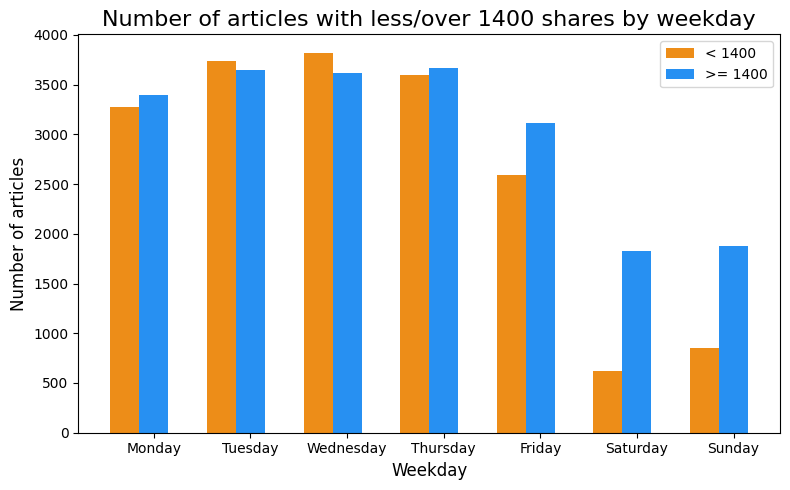

In [20]:
Unpop=df[df['shares']<1400]
Pop=df[df['shares']>=1400]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (8,5))

plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = (237/255, 141/255, 24/255), label = "< 1400")
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = (39/255, 144/255, 242/255), label = ">= 1400")
plt.xticks(np.arange(len(Wd2)), Wd2)
plt.title("Number of articles with less/over 1400 shares by weekday", fontsize = 16)
plt.ylabel("Number of articles", fontsize = 12)
plt.xlabel("Weekday", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()

plt.show()

## n_art_in_day i n_art_in_day podzial and category

In [21]:
df['n_art_in_day'] = df['shares'].groupby(df['timedelta']).transform('count')


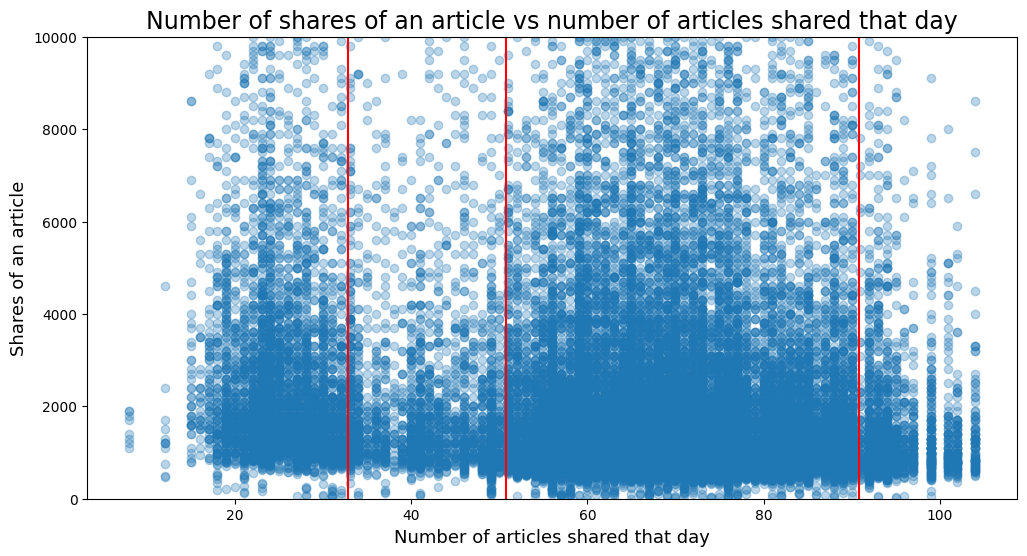

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['n_art_in_day'], df["shares"],alpha=0.3)

line = mlines.Line2D([0.28, 0.28], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.45, 0.45], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.83, 0.83], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

#ax.set_title("Liczba udostępnień artykułów w zależności od liczby artykułów opublikowanych w dniu",fontsize=17)
ax.set_title("Number of shares of an article vs number of articles shared that day",fontsize=17)
ax.set_ylabel("Shares of an article",fontsize=13)
ax.set_xlabel("Number of articles shared that day",fontsize=13)
ax.set_ylim(0, 10000)
plt.show()

In [23]:
conditions = [
    (df['n_art_in_day'] < 32),
    ((df['n_art_in_day'] >= 32) & (df['n_art_in_day'] < 51)),
    ((df['n_art_in_day'] >= 51) & (df['n_art_in_day'] < 90)),
    (df['n_art_in_day'] >= 90)]
choices = ["n_art_in_day_under_32","n_art_in_day_between_32_51","n_art_in_day_between_51_90","n_art_in_day_over_90"]
df['n_art_in_day_over_under'] = np.select(conditions, choices)

In [24]:
df = oneHot(df,'n_art_in_day_over_under')

## tokens_content_per_tokens_title

In [25]:
df['tok_content_per_tok_title'] = df['n_tokens_content'] /df['n_tokens_title']

In [26]:
df['tok_content_per_tok_title']

0         18.250000
1         28.333333
2         23.444444
3         59.000000
4         82.461538
            ...    
39639     31.454545
39640     27.333333
39641     44.200000
39642    113.666667
39643     15.700000
Name: tok_content_per_tok_title, Length: 39644, dtype: float64

## multimedia

In [27]:
over = 1
conditions = [
    (df['num_imgs']+df['num_videos'] > over),
    (df['num_imgs']+df['num_videos'] <= over)]
choices = [1,0]
df['mult_over_1'] = np.select(conditions, choices)

In [28]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]
how_many_unpopular = unpopular['mult_over_1'].sum()
how_many_popular = popular['mult_over_1'].sum()
print("Ratio of popular to unpopular articles for articles with more than 1 media aspect: " + str(how_many_popular/how_many_unpopular))

how_many_unpopular = df.shape[0]-unpopular['mult_over_1'].sum()
how_many_popular = df.shape[0]-popular['mult_over_1'].sum()
print("Ratio of popular to unpopular articles for articles with a maximum of 1 media aspect: " + str(how_many_popular/how_many_unpopular))

Ratio of popular to unpopular articles for articles with more than 1 media aspect: 1.3335909040732972
Ratio of popular to unpopular articles for articles with a maximum of 1 media aspect: 0.9011933954552885


## hrefs_ratio

In [29]:
df['hrefs_ratio'] = df['num_self_hrefs']/df['num_hrefs']
df = df.fillna(0,axis=1)

In [30]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]
sr_unpopular = unpopular['hrefs_ratio'].mean()
sr_popular= popular['hrefs_ratio'].mean()
print("Average for popular: " + str(sr_popular))
print("Average for unpopular: " + str(sr_unpopular))

Average for popular: 0.39452788241302095
Average for unpopular: 0.4274381358128969


In [31]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [32]:
cols = [ 'timedelta','n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_unique_tokens','num_hrefs','num_self_hrefs',
         'num_imgs','num_videos','average_token_length','num_keywords','kw_avg_min','kw_avg_max','kw_avg_avg','kw_min_min','kw_min_max','kw_min_avg','kw_max_min','kw_max_max','kw_max_avg',
         'self_reference_avg_sharess','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04',
         'global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
         'avg_positive_polarity','avg_negative_polarity','title_subjectivity','title_sentiment_polarity',
         'is_weekend','data_channel_is_tech','data_channel_is_bus','data_channel_is_lifestyle','data_channel_is_world','data_channel_is_entertainment','data_channel_is_socmed',
         'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity', 'max_negative_polarity',
         'tok_content_per_tok_title', 'n_art_in_day', 'hrefs_ratio',
         'mult_over_1',
         'dc_is_lifestyle_socmed','dc_is_world_enter','dc_is_tech_other',
         'n_art_in_day_under_32','n_art_in_day_between_32_51','n_art_in_day_between_51_90',
         'target','shares']
len(cols)

57

In [33]:
data_Classify = df[cols]
data_Reg = data_Classify.drop(columns='target')

In [34]:
data_Classify = data_Classify.drop(columns='shares')

In [35]:
def Normalize(X):
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(X.values)
    data_x = pd.DataFrame(x_scaled, columns = cols)
    return data_x

In [36]:
data_Classify_N = Normalize(data_Classify)

In [37]:
data_Classify_N

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90,target
0,1.0,0.476190,0.025844,0.000947,0.001254,0.013158,0.017241,0.007812,0.000000,0.582024,...,0.739583,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.333333,0.030092,0.000863,0.001218,0.009868,0.008621,0.007812,0.000000,0.611043,...,0.739583,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.333333,0.024900,0.000820,0.001021,0.009868,0.008621,0.007812,0.000000,0.546334,...,0.739583,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.333333,0.062662,0.000719,0.001024,0.029605,0.000000,0.007812,0.000000,0.547768,...,0.739583,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.523810,0.126505,0.000593,0.000832,0.062500,0.163793,0.156250,0.000000,0.582331,...,0.739583,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.428571,0.040831,0.000755,0.001054,0.029605,0.060345,0.007812,0.010989,0.562470,...,0.000000,0.777778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
39640,0.0,0.476190,0.038707,0.000993,0.001362,0.029605,0.060345,0.023438,0.527473,0.547842,...,0.000000,0.777778,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
39641,0.0,0.380952,0.052160,0.000737,0.000991,0.078947,0.008621,0.093750,0.010989,0.631338,...,0.000000,0.041667,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
39642,0.0,0.190476,0.080481,0.000770,0.001066,0.032895,0.008621,0.007812,0.000000,0.618672,...,0.000000,0.100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
X = data_Classify_N.drop(columns=['target'])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, data_Classify_N['target'], random_state=1, test_size = 0.4)

In [40]:
X_train

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,tok_content_per_tok_title,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90
21710,0.408022,0.380952,0.054402,0.000737,0.000988,0.036184,0.008621,0.062500,0.000000,0.575375,...,0.048962,0.562500,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17567,0.526971,0.476190,0.118362,0.000594,0.000856,0.095395,0.017241,0.195312,0.010989,0.569947,...,0.088772,0.197917,0.068966,1.0,0.0,1.0,0.0,1.0,0.0,0.0
20611,0.437068,0.380952,0.044017,0.000737,0.000993,0.026316,0.068966,0.007812,0.000000,0.552427,...,0.039615,0.489583,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24358,0.340249,0.333333,0.064904,0.000659,0.000890,0.023026,0.043103,0.007812,0.000000,0.585596,...,0.064904,0.677083,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29240,0.228216,0.285714,0.120250,0.000691,0.001059,0.036184,0.008621,0.007812,0.000000,0.603100,...,0.135281,0.208333,0.090909,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.796680,0.285714,0.092164,0.000697,0.001002,0.046053,0.017241,0.007812,0.000000,0.605849,...,0.103685,0.500000,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32511,0.153527,0.428571,0.045551,0.000834,0.001115,0.052632,0.034483,0.015625,0.000000,0.554118,...,0.037269,0.770833,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5192,0.871369,0.476190,0.017583,0.000954,0.001210,0.003289,0.000000,0.000000,0.000000,0.561681,...,0.013187,0.593750,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12172,0.677732,0.428571,0.016639,0.000988,0.001359,0.006579,0.008621,0.000000,0.000000,0.591786,...,0.013614,0.635417,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 1.Decision tree from Scratch

In [44]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        


In [154]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [155]:
clf = DecisionTree()
clf.fit(X_train.values, y_train.values)

In [156]:
import pickle
# # Save the model to a file
# filename = 'decision_tree_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(clf, file)

In [159]:
filename = 'decision_tree_model.pkl'
# Load the saved model from a file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [160]:
predictions = loaded_model.predict(X_test.values)

# Calculate the accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6343170639424895


### 2. Linear Regression (without regularization, L1 regularization, L2 regularization, and elastic net)

In [53]:
data_Reg.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90,shares
0,731,12,219,0.663594,0.815385,4,2,1,0,4.680365,...,79,0.5,0,0,1,0,0,0,1,593
1,731,9,255,0.604743,0.791946,3,1,1,0,4.913725,...,79,0.333333,0,0,0,0,0,0,1,711
2,731,9,211,0.57513,0.663866,3,1,1,0,4.393365,...,79,0.333333,0,0,0,0,0,0,1,1500
3,731,9,531,0.503788,0.665635,9,0,1,0,4.404896,...,79,0.0,0,0,1,0,0,0,1,1200
4,731,13,1072,0.415646,0.54089,19,19,20,0,4.682836,...,79,1.0,1,0,0,1,0,0,1,505


In [95]:
data_Reg_N = Normalize(data_Reg)

In [ ]:
x = data_Reg_N.drop(columns='shares')
y = data_Reg['shares'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.3)

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Initialize the weights with zeros
        self.weights = np.zeros(X.shape[1])
        
        # Perform gradient descent
        for _ in range(self.num_iterations):
            gradients = 2 * X.T.dot(X.dot(self.weights) - y) / X.shape[0]
            self.weights -= self.learning_rate * gradients
    
    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Predict the target variable
        y_pred = X.dot(self.weights)
        return y_pred
    
    def mean_squared_error(self, y_true, y_pred):
        # Calculate the mean squared error
        mse = np.mean((y_true - y_pred) ** 2)
        return mse
    
    def root_mean_squared_error(self, y_true, y_pred):
        # Calculate the root mean squared error
        rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
        return rmse
    
    def mean_absolute_error(self, y_true, y_pred):
        # Calculate the mean absolute error
        mae = np.mean(np.abs(y_true - y_pred))
        return mae


In [ ]:
def calculate_r_squared(y_true, y_pred):
    # Calculate the sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    
    # Calculate the total sum of squares
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    
    # Calculate the R-squared
    r_squared = 1 - (ss_residual / ss_total)
    
    return r_squared

In [ ]:
# Assuming X_train and y_train are your training data
# and X_test is your test data

# Create an instance of LinearRegression
model = LinearRegression(learning_rate=0.1, num_iterations=10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = calculate_r_squared(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r_squared)

# Calculate performance metrics
mse = model.mean_squared_error(y_test, y_pred)
rmse = model.root_mean_squared_error(y_test, y_pred)
mae = model.mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.017123623849937153
Mean Squared Error: 133632746.89216343
Root Mean Squared Error: 11559.96310081323
Mean Absolute Error: 3088.1830390324567


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = calculate_r_squared(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r_squared)

# Calculate performance metrics
mse = model.mean_squared_error(y_test, y_pred)
rmse = model.root_mean_squared_error(y_test, y_pred)
mae = model.mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.017123623849937153
Mean Squared Error: 133632746.89216343
Root Mean Squared Error: 11559.96310081323
Mean Absolute Error: 3088.1830390324567


### 3. Classification with Linear Regression (using the threshold function seen in class):

In [ ]:
import numpy as np

class LinearRegressionClassifier:
    def __init__(self, threshold=0.5):
        self.threshold = threshold
        self.weights = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate the weights using the normal equation
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Predict the target variable
        y_pred = X.dot(self.weights)
        
        # Apply thresholding to obtain class labels
        y_pred_class = np.where(y_pred >= self.threshold, 1, 0)
        
        return y_pred_class

In [ ]:
# Assuming X_train and y_train are your training data
# and X_test is your test data

# Create an instance of LinearRegressionClassifier
model = LinearRegressionClassifier(threshold=0.5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the predicted class labels
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
def calculate_accuracy(y_true, y_pred):
    # Calculate the number of correctly classified samples
    correct = np.sum(y_true == y_pred)
    
    # Calculate the total number of samples
    total = len(y_true)
    
    # Calculate the accuracy
    accuracy = correct / total
    
    return accuracy

# Assuming y_true is the true class labels and y_pred is the predicted class labels

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)

# Print the accuracy value
print("Accuracy:", accuracy)

Accuracy: 0.5199268508008577


### 4.Logistic Regression for Classification

In [55]:
data_Classify_N.target.value_counts()

1.0    21154
0.0    18490
Name: target, dtype: int64

In [96]:
X = data_Classify_N.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, data_Classify_N['target'], random_state=1, test_size = 0.3)

In [56]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Initialize the weights and bias with zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Perform gradient descent
        for _ in range(self.num_iterations):
            linear_output = np.dot(X, self.weights) + self.bias
            predicted_probabilities = self.sigmoid(linear_output)
            
            # Calculate gradients
            gradients = np.dot(X.T, (predicted_probabilities - y)) / X.shape[0]
            bias_gradient = np.mean(predicted_probabilities - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * bias_gradient
    
    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate the predicted probabilities
        linear_output = np.dot(X, self.weights) + self.bias
        predicted_probabilities = self.sigmoid(linear_output)
        
        # Classify as 1 if probability >= 0.5, otherwise classify as 0
        y_pred = np.where(predicted_probabilities >= 0.5, 1, 0)
        
        return y_pred

In [97]:
# Create an instance of LogisticRegression
model = LogisticRegression(learning_rate=0.9, num_iterations=5500)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)

# Print the accuracy value
print("Accuracy:", accuracy)

Accuracy: 0.6536068606019841


### 5.Regression with k-Nearest Neighbors algorithm

In [131]:
x = data_Reg_N.drop(columns='shares')
y = data_Reg['shares'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.3)

In [134]:
class KNNRegressor:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.tree = None
    
    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values
        self.tree = BallTree(self.X_train)
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))
    
    def predict(self, X_test):
        X_test = X_test.values
        _, indices = self.tree.query(X_test, k=self.k)
        nearest_targets = self.y_train[indices]
        y_pred = np.mean(nearest_targets, axis=1)
        return y_pred


In [138]:
# Create an instance of KNNRegressor with k=5
model = KNNRegressor(k=15)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.values, y_pred))

# Print the RMSE value
print("RMSE:", rmse)

RMSE: 11773.440697462063


### 6.Classification with k-Nearest Neighbors algorithm

In [142]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.tree = None
    
    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values
        self.tree = BallTree(self.X_train)
    
    def predict(self, X_test):
        X_test = X_test.values
        _, indices = self.tree.query(X_test, k=self.k)
        nearest_labels = self.y_train[indices]
        y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=nearest_labels)
        return y_pred


In [149]:
data_Classify_N['target'] = data_Classify_N['target'].astype('int64')

In [151]:
X = data_Classify_N.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, data_Classify_N['target'], random_state=1, test_size = 0.3)

In [152]:
# Create an instance of KNNClassifier
model = KNNClassifier(k=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)

# Print the accuracy value
print("Accuracy:", accuracy)

Accuracy: 0.6140070623843955
